# Project: Movie Trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> The data that was chosen for this was from Kaggle's TMDB database. This Database acummulates infromation on the history of movies. This review will look at data surrounding the aveage review score and look at budget/revenue relation, and the popularity and runtime to determine if there is a set of variables that can determine the reception of the movie outside of the story.
>> The specific questions to ask would be; what directors have the highest reviewed movies, are revenue and reviews related, are ratings and popularity related, do budget and revenue relate to ratings, how have ratings trended over the years


In [1]:
# This code is to import the modules to be used thoughout the exploration of the data available.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# This is to read the csv
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# This is to view the rows and view an example of the data to be explored.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Taking a look at the database's first five rows. It appears if the Keywords were omitted. In order to see the omitted area another head function will be used to view the data.

In [4]:
#This is the same code previously in order to show that ellipsesed rows.
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

> Now that the first five rows of the database have been viewed. An understanding of the sample data can be surmized as to what kind of data can be exepected inside each of the rows.

In [7]:
# This is to view the initial statitics of the spreadsheet
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# In order to view more data to determine what would be a broader range for the ratings this is to view the variance.
np.var(df.vote_average, axis =0)

0.874409735275952

> In looking at the suplemental data in the mathmatical portion of the data it is observed that the vote average of the movies are 5.97 with a standard deviation of 0.94 rounding from the third decimal. In order to see addition math on the vote average the decision was to research the variance from the vote average.

In [9]:
# Now that the code has been viewed, this code is to see the empty rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
# This is to view the length and width to ascertain the rows that are expendable and the extent of the rows

df.shape

(10866, 21)

> In order to see what values are missing a view of the infomation and shape were performed. This shows missing data in several rows (IMDB ID, CAST, HomePage, Director, Tagline, Keywords, Overview, Genres, and Production Companies). These will be considered to view the data in cleaning the data

> In order to see the view what kinds of movies have websites, the year that the first movie with a webite should be discovered.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# This is to remove the rows that will not be used in the exploration of the data
df.drop(['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'homepage', 'cast', 'release_date'], axis=1, inplace = True)

In [12]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


> Now that we got rid of the initial values that will not be used. It is time to decide how the next level of data that will be compared against will be used.

> Seeing as how all of the remaining missing values are Objects. A sample of the Odjects missing will be represented to determine how to properly fill the values.

In [13]:
# This is to fill the NaN values of the Production companies

df['production_companies'] = df['production_companies'].replace(np.NaN, 'Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 933.8+ KB


> Now that the production companies and cast have been dealt with we can drop the handful of the directorless and genreless movies as they total less than one hundred and shouldn't have massive effects on the distributions.

In [14]:
# This is to drop the remaining rows without values

df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10801 non-null float64
budget                  10801 non-null int64
revenue                 10801 non-null int64
original_title          10801 non-null object
director                10801 non-null object
runtime                 10801 non-null int64
genres                  10801 non-null object
production_companies    10801 non-null object
vote_count              10801 non-null int64
vote_average            10801 non-null float64
release_year            10801 non-null int64
budget_adj              10801 non-null float64
revenue_adj             10801 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1012.6+ KB


> Now that all rows are filled an additional row will be created to advertise the movies that are average, above average, and below average. In order to determine above average and below average the mean vote plus the standard deviation will be used for above and the mean minus the standard deviation will be used to add the below average.

In [15]:
# This will use the value scale of 5 and build around the average plus/minus one standard deviation.
# The highest and lowest categories will use 2 standard deviations for the mean.

rating = []
for score in df['vote_average']:
    if score > (np.mean(df.vote_average, axis =0) + (np.std(df.vote_average, axis = 0) * 2)):
        rating.append('Excellent')
    elif score > (np.mean(df.vote_average, axis =0) + np.std(df.vote_average, axis = 0)):
        rating.append('Above Average')
    elif score < (np.mean(df.vote_average, axis =0) - np.std(df.vote_average, axis = 0)):
        rating.append('Below Average')
    elif score < (np.mean(df.vote_average, axis =0) - (np.std(df.vote_average, axis = 0) * 2)):
        rating.append('Poor')
    else:
        rating.append('Average')
df['rating'] = rating    
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Average
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Above Average
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Average
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Above Average
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Above Average


In [16]:
# This will do the same as above, but assign a numerical value as well.

rate = []
for scores in df['vote_average']:
    if scores > (np.mean(df.vote_average, axis =0) + (np.std(df.vote_average, axis = 0) * 2)):
        rate.append('5')
    elif scores > (np.mean(df.vote_average, axis =0) + np.std(df.vote_average, axis = 0)):
        rate.append('4')
    elif scores < (np.mean(df.vote_average, axis =0) - np.std(df.vote_average, axis = 0)):
        rate.append('2')
    elif scores < (np.mean(df.vote_average, axis =0) - (np.std(df.vote_average, axis = 0) * 2)):
        rate.append('1')
    else:
        rate.append('3')
df['rate_of_5'] = rate
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating,rate_of_5
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Average,3
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Above Average,4
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Average,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,Above Average,4
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,Above Average,4


<a id='eda'></a>
## Exploratory Data Analysis


### How are the vote averages dispersed?

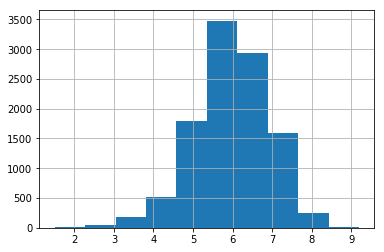

In [17]:
# This is to view the dispersement of the  vote averages across films

df['vote_average'].hist();

> It appears as if the vote average skews to the left.

### Are Popularity and Reviews correlated?

Text(0,0.5,'Popularity')

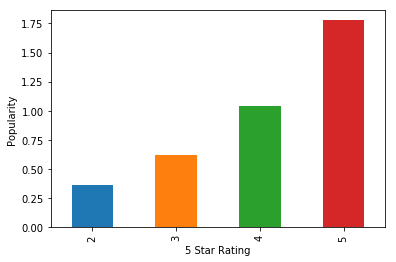

In [18]:
# This is to view the average popularity vs the reviews

pop_rate = df.groupby('rate_of_5').popularity.mean().plot(kind='bar')
pop_rate.set_xlabel('5 Star Rating')
pop_rate.set_ylabel('Popularity')

Text(0,0.5,'Popularity')

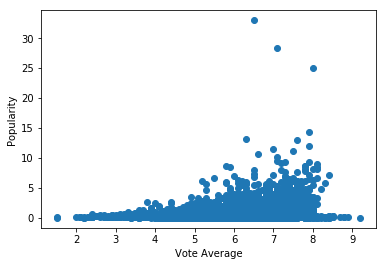

In [19]:
#This is view outliers that may be affecting the popularity

plt.scatter(df['vote_average'], df['popularity']);
plt.xlabel('Vote Average')
plt.ylabel('Popularity')

> It appears that the popularity does increase in the vote average to a point. There also appear to be a few outliers that result in the average rating being being higher than trends allow

### Are the number of voters affecting the review average?

Text(0,0.5,'Number of Voters')

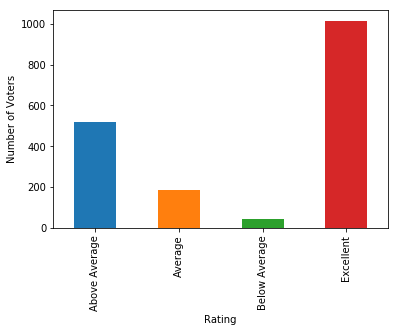

In [20]:
# Does the number of voters trend the rating in a direction
num_rating = df.groupby('rating').vote_count.mean().plot(kind='bar');
num_rating.set_xlabel('Rating')
num_rating.set_ylabel('Number of Voters')

> It appears that the more reviewers that there are the more likely the review will be positive. This may be due to the quality of the film or the popularity mentioned review.

### Does revenue affect reviews?

> In this The movie review average will be compared to the revenue

Text(0,0.5,'Revenue')

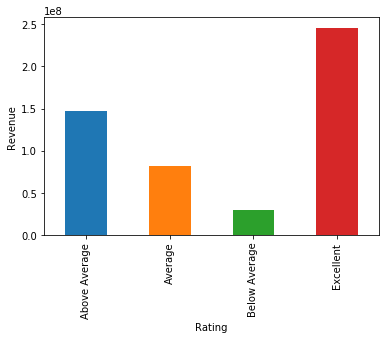

In [21]:
# This is to view the average revenue compared to the rating generated
rev_rate = df[df.revenue > 0].groupby('rating').revenue.mean().plot(kind = 'bar');
rev_rate.set_xlabel('Rating')
rev_rate.set_ylabel('Revenue')

> It does appear that the revenue is on average affected by the reception of the movies in the timeframe that is available. This may be due the excitement surrounding well received movies.

### Are big budgets creating more favorable review scores?

Text(0,0.5,'Budgets')

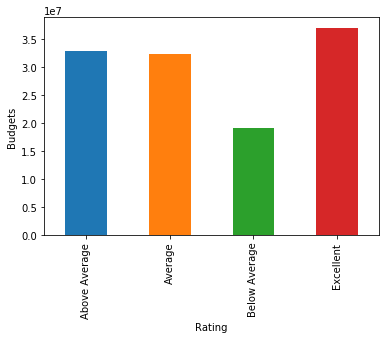

In [22]:
# This is to view the average budget vs ratings
bud_rate = df[df.budget > 0].groupby('rating').budget.mean().plot(kind = 'bar');
bud_rate.set_xlabel('Rating')
bud_rate.set_ylabel('Budgets')

> It appears as if the budget does not dictate the review but it may appear that the production studios may have the foresight on where to spend the money to avoid poor reception

### Which Director had the highest rated Movie?

In [23]:
# This will show the most popular directors on average
df.groupby('director').vote_average.mean().nlargest(5)

director
Mark Cousins                            9.2
Derek Frankowski                        8.8
David Mallet                            8.7
Curt Morgan                             8.5
Martin Scorsese|Michael Henry Wilson    8.5
Name: vote_average, dtype: float64

In [24]:
# This will show the stats on the movie that is rated highest

df.loc[df['vote_average']==9.2]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating,rate_of_5
3894,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,Unknown,14,9.2,2011,0.0,0.0,Excellent,5


### Relating Length vs Rating

Text(0,0.5,'Runtime')

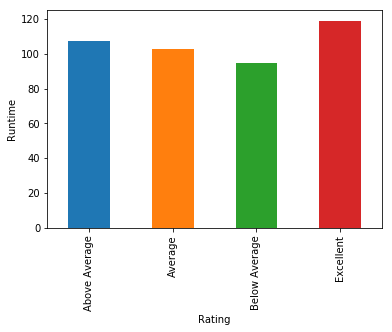

In [25]:
# This is to see the bar graph comparing average runtime to the reviews
len_rate = df[df.runtime > 0].groupby('rating').runtime.mean().plot(kind='bar')
len_rate.set_xlabel('Rating')
len_rate.set_ylabel('Runtime')

Text(0,0.5,'Runtime')

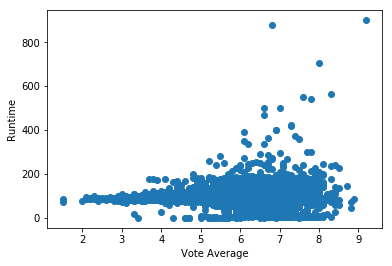

In [26]:
# This will show the runtime of the average movie against the votes

plt.scatter(df['vote_average'], df.runtime );
plt.xlabel('Vote Average')
plt.ylabel('Runtime')

> It does appear that people will be slightly more willing to sit through longer movies if the film quality is higher.

### What was the golden era of movies

Text(0,0.5,'Vote Average')

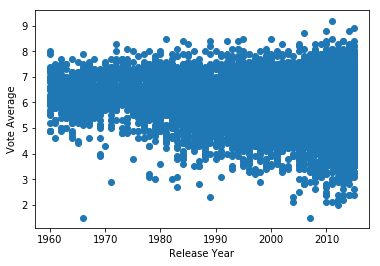

In [27]:
# This will the  view the trends of the movie votes over time
plt.scatter(df['release_year'], df['vote_average'])
plt.xlabel('Release Year')
plt.ylabel('Vote Average')

> All films being equal, It appears that we are currently trending upward in movie quality. There does seem to be more negative ratings that have come out as time has progressed.

<a id='conclusions'></a>
## Conclusions

> This exploration is limited into understanding the why's and tends to just show the correlation between the rating and the aspects going into the films themselves. This is understandable at the high level research but to better understand and predict the the critical analysis of the films the data is limited.
> 

> The Vote average does appear to skew slightly in the direction of the lower side of voting.
> This research did show that the higher recieved movies tend to yeild higher popularity and movies.
> Budgets did not reflect that highest films received better ratings. But there was a correlation in the reverse. Where films with lower ratings did not recieve a large movie budgets.
> The Highest rated movies appeared to be critical darlings and did not garner the support of the masses.
> Movies have been progressively get more favorable reviews over the years. They why maybe lacking but the trend does show more positive films and more negative films in the current decade than decades past.
> Movie goers seem to be willingly to sit through longer films, but whether it is because of the quality of the film or the movie goers view time for investment yeilds the rating is not to be determined